<ipython-input-1-a60efea5d44e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.propinsi[data.propinsi.str.startswith('-')] = np.nan
<ipython-input-1-a60efea5d44e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lokasi[data.lokasi.str.startswith('-')] = np.nan


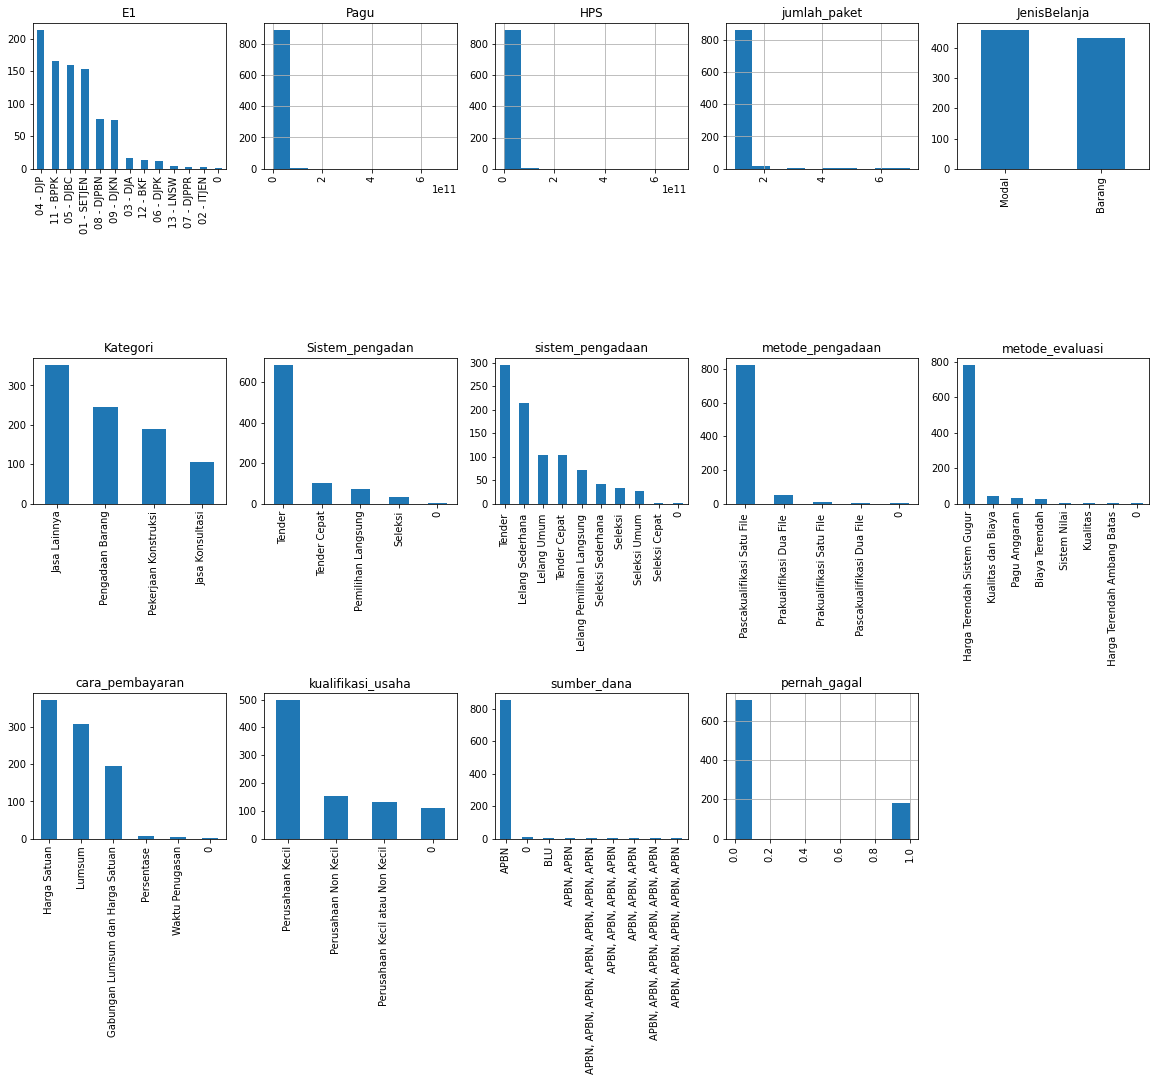

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('Train.csv', delimiter=';')
##,parsedates=['jadwal_awal_pengadaan','jadwal_akhir_pengadaan']
import matplotlib.pyplot as plt
%matplotlib inline

data.propinsi[data.propinsi.str.startswith('-')] = np.nan
data.lokasi[data.lokasi.str.startswith('-')] = np.nan

#data = data.dropna(how='any')

data['propinsi'].fillna(0)
data['lokasi'].fillna(0)


data = data.set_index('ID Tender')
#data = data.fill(how='any')
data = data.fillna(0)


datamentah = data[['Pagu','Akun', 'E1',
       'JenisBelanja', 'Kategori', 'Sistem_pengadan', 'HPS', 'jumlah_paket',
       'sistem_pengadaan', 'metode_pengadaan', 'metode_evaluasi',
       'cara_pembayaran', 'kualifikasi_usaha', 'sumber_dana','tkdn','lokasi', 'propinsi', 'pernah_gagal']]

datasimpel = datamentah.loc[:,['E1', 'Pagu','HPS','jumlah_paket',
                             'JenisBelanja', 'Kategori','Sistem_pengadan',  
                             'sistem_pengadaan','metode_pengadaan', 'metode_evaluasi', 'cara_pembayaran',
                             'kualifikasi_usaha', 'sumber_dana','pernah_gagal']]


from math import ceil
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(datasimpel.shape[1]) / cols)
# looping setiap kolom dan indeksnya
for i, column in enumerate(datasimpel.columns):
# urutan setiap subplot
    ax = fig.add_subplot(rows, cols, i + 1)
# set judul chart
    ax.set_title(column)
    if datasimpel.dtypes[column] == np.object:
        datasimpel[column].value_counts().plot(kind="bar", axes=ax)
    else:
        datasimpel[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=1.3, wspace=0.2)


<ipython-input-2-af9fe6fb9abe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.propinsi[test.propinsi.str.startswith('-')] = np.nan
<ipython-input-2-af9fe6fb9abe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.lokasi[test.lokasi.str.startswith('-')] = np.nan


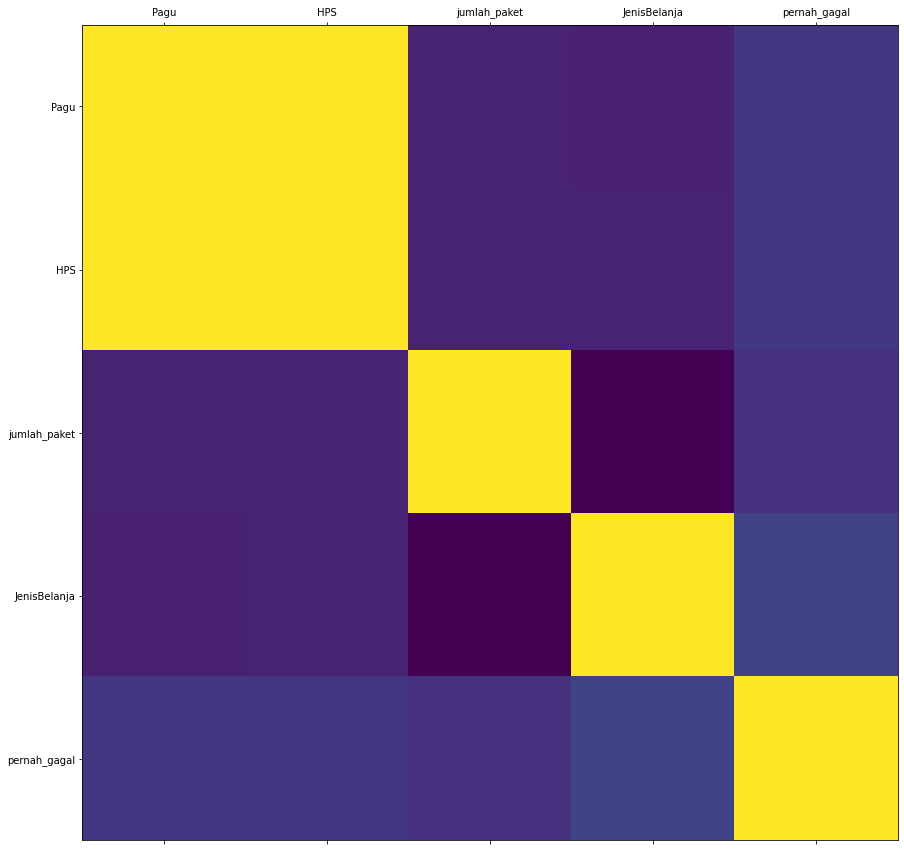

In [2]:
test = pd.read_csv('Test.csv', delimiter=';')

test.propinsi[test.propinsi.str.startswith('-')] = np.nan
test.lokasi[test.lokasi.str.startswith('-')] = np.nan

test['propinsi'].fillna(0)
test['lokasi'].fillna(0)

test = test.set_index('ID Tender')
test = test.fillna(0)

testmentah = test[['Pagu','Akun', 'E1',
       'JenisBelanja', 'Kategori', 'Sistem_pengadan', 'HPS', 'jumlah_paket',
       'sistem_pengadaan', 'metode_pengadaan', 'metode_evaluasi',
       'cara_pembayaran', 'kualifikasi_usaha', 'sumber_dana','tkdn','lokasi', 'propinsi']]

testsimpel = testmentah.loc[:,['E1', 'Pagu','HPS','jumlah_paket',
                             'JenisBelanja', 'Kategori','Sistem_pengadan',  
                             'sistem_pengadaan','metode_pengadaan', 'metode_evaluasi', 'cara_pembayaran',
                             'kualifikasi_usaha', 'sumber_dana']]


datasimpel['JenisBelanja'] = datasimpel['JenisBelanja'].map({'Modal':1,'Barang':0}).astype(int)
#datasimpel['tkdn'] = datasimpel['tkdn'].map({'tidak':2,'ya':1,0:0}).astype(int)

testsimpel['JenisBelanja'] = testsimpel['JenisBelanja'].map({'Modal':1,'Barang':0}).astype(int)

def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()
plot_correlation(datasimpel)

In [3]:
del datasimpel['Pagu']
del testsimpel['Pagu']


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
datasimpel['E1'] = le.fit_transform(datasimpel['E1'].astype(str))
datasimpel['Kategori'] = le.fit_transform(datasimpel['Kategori'].astype(str))
datasimpel['Sistem_pengadan'] = le.fit_transform(datasimpel['Sistem_pengadan'].astype(str))
datasimpel['sistem_pengadaan'] = le.fit_transform(datasimpel['sistem_pengadaan'].astype(str))
datasimpel['metode_pengadaan'] = le.fit_transform(datasimpel['metode_pengadaan'].astype(str))
datasimpel['metode_evaluasi'] = le.fit_transform(datasimpel['metode_evaluasi'].astype(str))
datasimpel['cara_pembayaran'] = le.fit_transform(datasimpel['cara_pembayaran'].astype(str))
datasimpel['kualifikasi_usaha'] = le.fit_transform(datasimpel['kualifikasi_usaha'].astype(str))
datasimpel['sumber_dana'] = le.fit_transform(datasimpel['sumber_dana'].astype(str))

testsimpel['E1'] = le.fit_transform(testsimpel['E1'].astype(str))
testsimpel['Kategori'] = le.fit_transform(testsimpel['Kategori'].astype(str))
testsimpel['Sistem_pengadan'] = le.fit_transform(testsimpel['Sistem_pengadan'].astype(str))
testsimpel['sistem_pengadaan'] = le.fit_transform(testsimpel['sistem_pengadaan'].astype(str))
testsimpel['metode_pengadaan'] = le.fit_transform(testsimpel['metode_pengadaan'].astype(str))
testsimpel['metode_evaluasi'] = le.fit_transform(testsimpel['metode_evaluasi'].astype(str))
testsimpel['cara_pembayaran'] = le.fit_transform(testsimpel['cara_pembayaran'].astype(str))
testsimpel['kualifikasi_usaha'] = le.fit_transform(testsimpel['kualifikasi_usaha'].astype(str))
testsimpel['sumber_dana'] = le.fit_transform(testsimpel['sumber_dana'].astype(str))

datatest = testsimpel.copy()



df = datasimpel.copy()
from sklearn.model_selection import train_test_split

# X merupakan dataset kecuali target variabel
X = df.drop(['pernah_gagal'],axis=1)
y = df.pernah_gagal

# kita gunakan 70% data training
split_size=0.3

# Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

# Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



models = []

names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM','MLPClassifier']

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))

models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))


from sklearn import model_selection
from sklearn.metrics import accuracy_score


kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='f1')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


----------------------------------------
LR: 0.76
----------------------------------------
Random Forest: 0.728
----------------------------------------
Neural Network: 0.76
----------------------------------------
GaussianNB: 0.76
----------------------------------------
DecisionTreeClassifier: 0.68
----------------------------------------
SVM: 0.76


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
parameters = {
    'solver':['sag', 'saga'], 
    'tol':[1e-4], 
    'max_iter':[500],
    'random_state':[1]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [500], 'random_state': [1],
                         'solver': ['sag', 'saga'], 'tol': [0.0001]})

In [43]:
cv.best_score_

0.806

In [40]:
cv.best_params_

{'max_iter': 500, 'penalty': 'l2', 'random_state': 1, 'tol': 0.0001}

In [103]:
len(datasimpel)

893

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [100],
    'max_depth': [0,1,2,3],
    'learning_rate': [0.1]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Dell\anaconda3\lib\site-packag

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [0, 1, 2, 3],
                         'n_estimators': [100]})

In [72]:
cv.best_score_

0.8019999999999999

In [73]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [1],
    'max_depth': [3],
    'learning_rate': [0.1]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())
y_predict = cv.predict(testsimpel)

In [114]:
y_hats_df = pd.DataFrame(data = y_predict, columns = ['pernah_gagal'], index = pd.DataFrame(testsimpel).index.copy())
df_out = pd.merge(testsimpel, y_hats_df, how = 'left', left_index = True, right_index = True)

df_final = df_out[['pernah_gagal']]
df_final.head()
input_kaggle =df_final.dropna(how='any')

input_kaggle.to_csv (r'GradientBoostingClassifier_n-estimator_1.csv', sep=',', index = True, header=True) 
